# Clustering - Introduction

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is similar conceptually to *classification*, except that the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. The numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

## Load the data

1. Download [seeds.csv](https://raw.githubusercontent.com/MicrosoftLearning/mslearn-ml-basics/refs/heads/main/Labfiles/data/seeds.csv){:target="_blank"} in a new browser tab, and save it on your local disk.
2. Then use the **Upload Data** button at the top of this notebook to upload it.
3. Run the next cell by clicking the **▶️ Run** button to load the data.

> **Citation**: The seeds dataset used in this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin by Dua, D. and Graff, C. (2019). and can be downloaded from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml), University of California at Irvine, School of Information and Computer Science.


In [3]:
import pandas as pd

# load the training dataset
data = pd.read_csv("Data/seeds.csv")

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
print(features.sample(10))


      area  perimeter  compactness  kernel_length  kernel_width  \
130  18.30      15.89       0.9108          5.979         3.755   
172  11.27      12.97       0.8419          5.088         2.763   
140  13.07      13.92       0.8480          5.472         2.994   
148  12.70      13.71       0.8491          5.386         2.911   
74   16.82      15.51       0.8786          6.017         3.486   
15   14.59      14.28       0.8993          5.351         3.333   
118  18.89      16.23       0.9008          6.227         3.769   
73   19.11      16.26       0.9081          6.154         3.930   
72   17.26      15.73       0.8763          5.978         3.594   
47   14.99      14.56       0.8883          5.570         3.377   

     asymmetry_coefficient  
130                  2.837  
172                  4.309  
140                  5.304  
148                  3.260  
74                   4.004  
15                   4.185  
118                  3.639  
73                   2.936  
7

As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Six-dimensional space is difficult to visualize in a three-dimensional world, or on a two-dimensional plot. We'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
print(features_2d[0:10])


[[ 0.11883593 -0.09382469]
 [ 0.0696878  -0.31077233]
 [-0.03499184 -0.37044705]
 [-0.06582089 -0.36365235]
 [ 0.32594892 -0.37695797]
 [-0.02455447 -0.31060184]
 [-0.00769646 -0.07594931]
 [-0.05646955 -0.26696284]
 [ 0.38196305 -0.05149471]
 [ 0.35701044 -0.17697998]]


Now that we have the data points translated to two dimensions, we can visualize them in a plot.


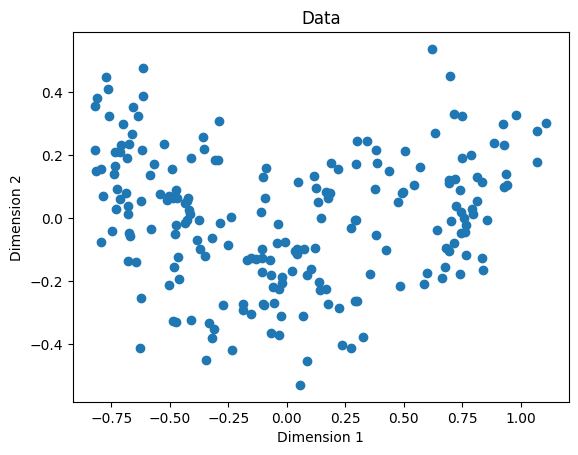

In [5]:
import matplotlib.pyplot as plt

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


Hopefully you can see at least two, arguably three, reasonably distinct groups of data points. This shows one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.


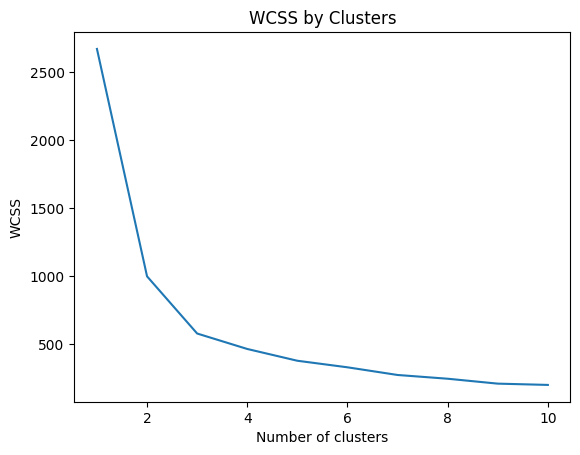

In [6]:
#importing the libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticeable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## Summary

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. In the next notebook, we will look at two ways of labelling the data automatically.
